In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit

In [2]:
def chi_sq(x, y, err):
    function = lambda x, a, b: a * x + b
    popt, pcov = curve_fit(function, xdata=x, ydata=y, sigma=err)

    sigma_a = np.sqrt(pcov[0, 0])
    sigma_b = np.sqrt(pcov[1, 1])

    return popt[0], popt[1], sigma_a, sigma_b

In [3]:
sns.set_theme()

In [85]:
df = pd.read_excel('9_1.xlsx')

In [86]:
df

,Внутри,"f, кГц","f0, кГц",T,"V, мВ",Unnamed: 5,мВ,U,f,f0,T.1,T+t,Unnamed: 12,res,Unnamed: 14,Unnamed: 15,er,Unnamed: 17
0,4.0,953.2,964.53,23.0,0.10,начал,0.11,0.10,930.70,954.00,-2.40,20.60,NaN,19.725194,0.878497,-0.857041,0.242088,0.012273
1,3.0,930.7,954.04,23.0,-0.01,NaN,0.49,0.48,905.38,953.95,-11.52,11.48,NaN,9.076893,0.202052,-0.191765,0.025285,0.002786
2,NaN,мкВ/С,NaN,NaN,NaN,NaN,0.52,0.51,905.76,954.00,-12.24,10.76,NaN,9.144544,0.204838,-0.194481,0.025829,0.002825
3,NaN,0.041,NaN,NaN,NaN,NaN,0.47,0.46,906.20,954.00,-11.04,11.96,NaN,9.235504,0.208630,-0.198176,0.026575,0.002877
4,NaN,NaN,NaN,NaN,NaN,NaN,0.40,0.39,906.54,953.97,-9.36,13.64,NaN,9.312983,0.211893,-0.201358,0.027223,0.002923
5,NaN,мВ/С,NaN,NaN,NaN,NaN,0.37,0.36,907.10,954.16,-8.64,14.36,NaN,9.394018,0.215283,-0.204665,0.027904,0.002970
6,NaN,0.0416667,NaN,NaN,NaN,NaN,0.34,0.33,908.30,953.98,-7.92,15.08,NaN,9.698120,0.228452,-0.217513,0.030592,0.003154
7,NaN,NaN,NaN,NaN,NaN,NaN,0.30,0.29,909.28,954.18,-6.96,16.04,NaN,9.881636,0.236513,-0.225384,0.032284,0.003267
8,NaN,NaN,NaN,NaN,NaN,NaN,0.27,0.26,910.80,954.00,-6.24,16.76,NaN,10.297458,0.255457,-0.243889,0.036369,0.003532
9,NaN,NaN,NaN,NaN,NaN,NaN,0.23,0.22,913.70,954.06,-5.28,17.72,NaN,11.074778,0.292712,-0.280329,0.044886,0.004053


In [51]:
T = np.array(df['T+t'])
res = np.array(df['res'])

In [88]:
er = np.array(df['er'])

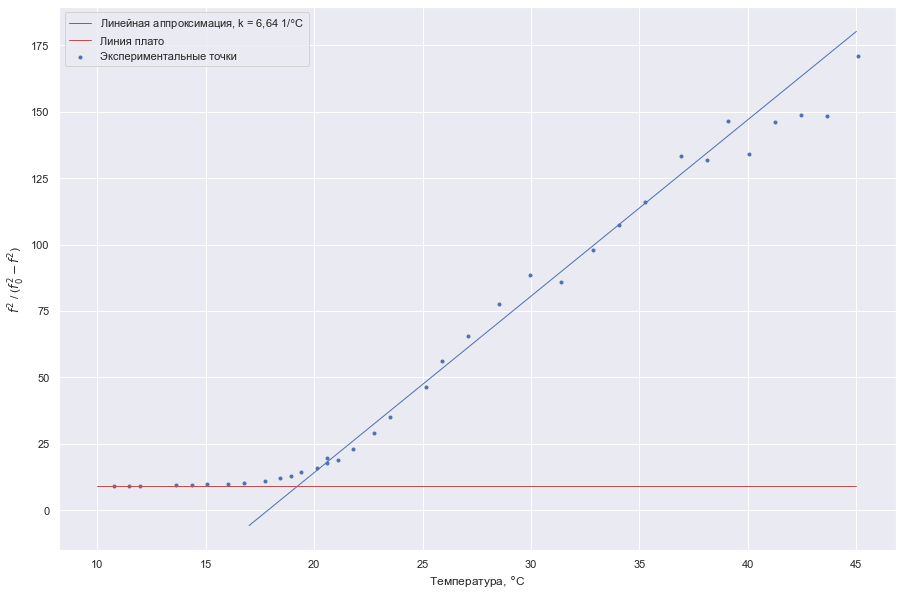

In [94]:
plt.rcParams["figure.figsize"] = (15,10)

x = np.linspace(17, 45, 500)
a, b, s, e = chi_sq(T[14:32], res[14:32], None)
y = a * x + b
y_ = np.ones(500) * 9.1
x_ = np.linspace(10, 45, 500)
plt.plot(x, y, lw = 1, label = 'Линейная аппроксимация, k = 6,64 1/$\degree$C')
plt.plot(x_, y_, lw = 1, color = 'r', label = 'Линия плато')
#x = np.linspace(2, 9, 100)
#y = func(x, 1512.8, 5.5, 1.42)
#plt.plot(x, y, color = 'm', lw = 0.5)
#print (popt)



#plt.errorbar(T[0:27], res[0:27], xerr = None, yerr= er[0:27], fmt='.',color='b',capthick=1,elinewidth=0.5,capsize=1,zorder=10 )
plt.scatter(T, res, marker = '.', color = 'b',label = 'Экспериментальные точки')
plt.xlabel('Температура, $\degree$C')
plt.ylabel('$f^{2}$ / ($f_{0}^{2} - f^{2}$)')
plt.legend()

In [95]:
a , b, s, e

(6.644197362187478, -118.7577026047216, 0.19683291308038334, 5.972416155923992)

In [97]:
th = (9.1 - b) / a

In [109]:
sig_th = th * np.sqrt((0.05/9.1)**2 + (s/a)**2 + (e/b)**2)

In [110]:
th, sig_th

(19.243513645811813, 1.128165467015707)

In [102]:
J_erg = 3 * 1.38 * 10**(-16) * (th + 273) / (2 * 12 * 7/2 * 9/2)

In [103]:
J_ev = 3 * 8.617 * 10**(-5) * (th + 273) / (2 * 12 * 7/2 * 9/2)

In [104]:
J_erg, J_ev

(3.2007622923112716e-16, 0.0001998620918322191)

In [105]:
J_K = J_ev * 11604.5

In [106]:
J_K

2.3192996446669865

In [112]:
sig_J_K = J_K * sig_th/th
sig_J_ev = J_ev * sig_th/th


In [113]:
sig_J_K, sig_J_ev

(0.13597068679526542, 1.171706551727911e-05)

In [114]:
(20.4 -  19.2)/20.4

0.05882352941176468